In [83]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from tabulate import tabulate

In [107]:
# Steps

N = 320
G = 12
P = 32
D = 0.2

P2 = 2 * P + 1

T_STEP = int(P / 5) + 1
I_STEP = int(N / 10) + 1

%run -i ./PHT-RIW-Library.ipynb

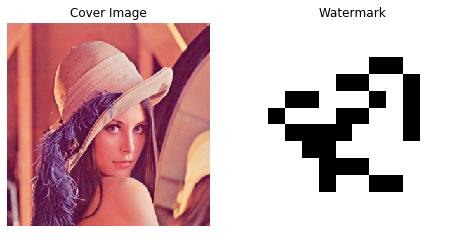

In [108]:
# Import images
ori_img = cv2.imread('./assets/lena.png') #BGR
ori_logo = cv2.imread('./assets/paperplane.png', 0)

n = N
p = P
g = G
d = D

# Preprocess Image
IMG_BGR = cv2.resize(ori_img, (n, n)) # Original Image
IMG_Y = getYFromBGR(IMG_BGR) #

# Preprocess Logo
LOGO = cv2.resize(ori_logo, (g,g))
LOGO = (LOGO >= 128) * 1
# LOGO = LOGO * 0

imgshow([[IMG_BGR, LOGO]], [['Cover Image', 'Watermark']])

Generating Compensation Image

Progress: [####################] 100.0%


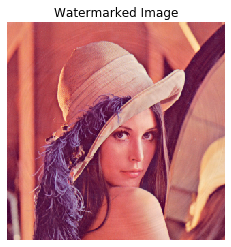

In [109]:
imgWatermarked = watermarkEmbedToImage(IMG_BGR, LOGO, n, g, p, d)
imgshow1(imgWatermarked, 'Watermarked Image')

In [110]:
# Calculate PSNR
MSE = np.mean((imgWatermarked - IMG_BGR) ** 2)
PSNR = 10 * np.log10(255 * 255 / MSE)

print(tabulate([[n, g, p, d, PSNR]], headers=['N', 'G', 'P', 'D', 'PSNR'], tablefmt='orgtbl'))

|   N |   G |   P |   D |    PSNR |
|-----+-----+-----+-----+---------|
| 320 |  12 |  32 | 0.2 | 41.0865 |


In [104]:
def war(image, n):
    attackedImages = []
    
    # No Attack
    attackedImages.append((np.copy(image), 'No Attack'))
    
    # Attack: Rotation
    ROTATION_ANGLE = 30
    imgRotate = attackRotation(image, ROTATION_ANGLE)
    attackedImages.append((imgRotate, 'Rotation {}° CW'.format(ROTATION_ANGLE)))
    
    # Attack: Scaling
    RESIZE_FACTOR = 0.85
    imgResize = attackResize(image, int(RESIZE_FACTOR * n))
    attackedImages.append((imgResize, 'Scaling ' + '{:.0%}'.format(RESIZE_FACTOR)))
    
    # Attack: Translation
    TR_X = 10
    TR_Y = -10
    imgTranslate = attackTranslateByPixel(image, TR_X, TR_Y)
    attackedImages.append((imgTranslate, 'Translation By Pixel X={} Y={}'.format(TR_X, TR_Y)))
    
    # Attack: Crop
    CROP_PERCENTAGE = 0.03
    imgCrop = attackCrop(image, CROP_PERCENTAGE, CROP_PERCENTAGE, CROP_PERCENTAGE, CROP_PERCENTAGE)
    attackedImages.append((imgCrop, 'Crop {:.0%}'.format(CROP_PERCENTAGE)))
    
    # Attack: BLUR
    BLUR_KERNEL_SIZE = 3
    imgBlur = attackBlur(image, BLUR_KERNEL_SIZE)
    attackedImages.append((imgBlur, 'Blur K={}'.format(BLUR_KERNEL_SIZE)))

    # Attack: Black & Pepper Noise
    NOISE_PERCENTAGE = 0.03
    imgNoise = attackRandomNoise(image, NOISE_PERCENTAGE)
    attackedImages.append((imgNoise, 'Noise {:.0%}'.format(NOISE_PERCENTAGE)))

    # Attack: JPG Compression
    COMPRESSION_QUALITY = 85
    imgJpg = attackJPG(image, COMPRESSION_QUALITY)
    attackedImages.append((imgJpg, 'JPG Compression Q={}'.format(COMPRESSION_QUALITY)))
    
    return attackedImages

In [112]:
extractedLogos = [None]*20
extractedBers = [None]*20
attackedImages = [None]*20
attackTitles = [None]*20

In [111]:
imgAttackedList = war(imgWatermarked, n)

BER = 0.00%
(0, 0, 1)


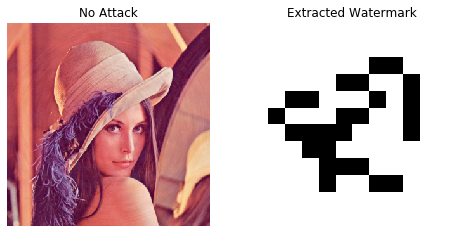

In [113]:
index = 0
(attackedImages[index], attackTitles[index]) = imgAttackedList[index]
(extractedLogos[index], extractedBers[index], transformation) = watermarkExtractFromImage(attackedImages[index], IMG_WATERMARKED, LOGO, n, g, p, d, False, 'N={} G={} P={} D={}\n{}'.format(n, g, p, d, attackTitles[index]))

clear_output(wait = True)
print('BER = {:.2%}'.format(extractedBers[index]))
print(transformation)
imgshow([[attackedImages[index], extractedLogos[index]]], [[attackTitles[index], 'Extracted Watermark']])

BER = 0.00%
(0, 0, 1)


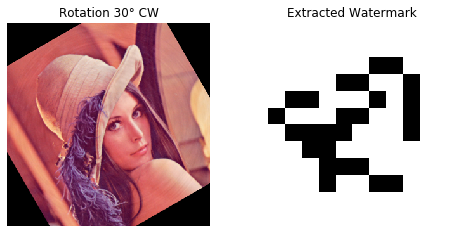

In [94]:
index = 1
(attackedImages[index], attackTitles[index]) = imgAttackedList[index]
(extractedLogos[index], extractedBers[index], transformation) = watermarkExtractFromImage(attackedImages[index], IMG_WATERMARKED, LOGO, n, g, p, d, False, 'N={} G={} P={} D={}\n{}'.format(n, g, p, d, attackTitles[index]))

clear_output(wait = True)
print('BER = {:.2%}'.format(extractedBers[index]))
print(transformation)
imgshow([[attackedImages[index], extractedLogos[index]]], [[attackTitles[index], 'Extracted Watermark']])

BER = 0.69%
(0, 0, 1)


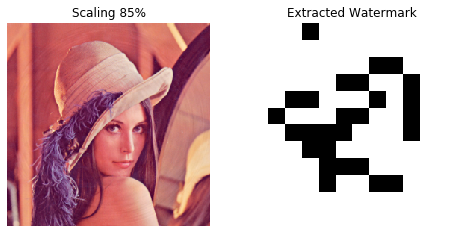

In [95]:
index = 2
(attackedImages[index], attackTitles[index]) = imgAttackedList[index]
(extractedLogos[index], extractedBers[index], transformation) = watermarkExtractFromImage(attackedImages[index], IMG_WATERMARKED, LOGO, n, g, p, d, False, 'N={} G={} P={} D={}\n{}'.format(n, g, p, d, attackTitles[index]))

clear_output(wait = True)
print('BER = {:.2%}'.format(extractedBers[index]))
print(transformation)
imgshow([[attackedImages[index], extractedLogos[index]]], [[attackTitles[index], 'Extracted Watermark']])

BER = 34.72%
(-10, 10, 1.0019999999999998)


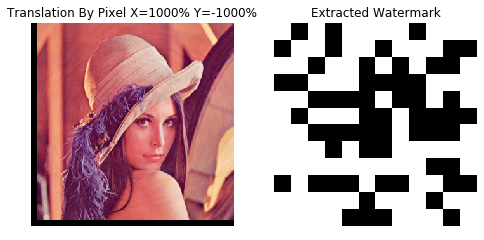

In [106]:
index = 3
(attackedImages[index], attackTitles[index]) = imgAttackedList[index]
(extractedLogos[index], extractedBers[index], transformation) = watermarkExtractFromImage(attackedImages[index], IMG_WATERMARKED, LOGO, n, g, p, d, True, 'N={} G={} P={} D={}\n{}'.format(n, g, p, d, attackTitles[index]))

clear_output(wait = True)
print('BER = {:.2%}'.format(extractedBers[index]))
print(transformation)
imgshow([[attackedImages[index], extractedLogos[index]]], [[attackTitles[index], 'Extracted Watermark']])

BER = 9.72%
(0, 0, 1)


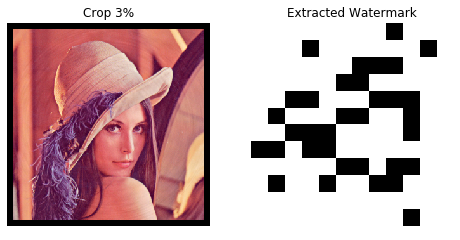

In [97]:
index = 4
(attackedImages[index], attackTitles[index]) = imgAttackedList[index]
(extractedLogos[index], extractedBers[index], transformation) = watermarkExtractFromImage(attackedImages[index], IMG_WATERMARKED, LOGO, n, g, p, d, False, 'N={} G={} P={} D={}\n{}'.format(n, g, p, d, attackTitles[index]))

clear_output(wait = True)
print('BER = {:.2%}'.format(extractedBers[index]))
print(transformation)
imgshow([[attackedImages[index], extractedLogos[index]]], [[attackTitles[index], 'Extracted Watermark']])

BER = 5.56%
(0, 0, 1)


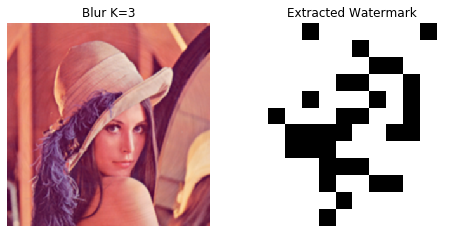

In [98]:
index = 5
(attackedImages[index], attackTitles[index]) = imgAttackedList[index]
(extractedLogos[index], extractedBers[index], transformation) = watermarkExtractFromImage(attackedImages[index], IMG_WATERMARKED, LOGO, n, g, p, d, False, 'N={} G={} P={} D={}\n{}'.format(n, g, p, d, attackTitles[index]))

clear_output(wait = True)
print('BER = {:.2%}'.format(extractedBers[index]))
print(transformation)
imgshow([[attackedImages[index], extractedLogos[index]]], [[attackTitles[index], 'Extracted Watermark']])

BER = 12.50%
(0, 0, 1)


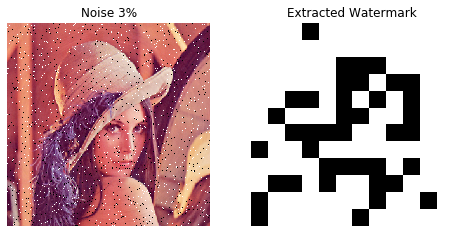

In [99]:
index = 6
(attackedImages[index], attackTitles[index]) = imgAttackedList[index]
(extractedLogos[index], extractedBers[index], transformation) = watermarkExtractFromImage(attackedImages[index], IMG_WATERMARKED, LOGO, n, g, p, d, False, 'N={} G={} P={} D={}\n{}'.format(n, g, p, d, attackTitles[index]))

clear_output(wait = True)
print('BER = {:.2%}'.format(extractedBers[index]))
print(transformation)
imgshow([[attackedImages[index], extractedLogos[index]]], [[attackTitles[index], 'Extracted Watermark']])

BER = 0.00%
(0, 0, 1)


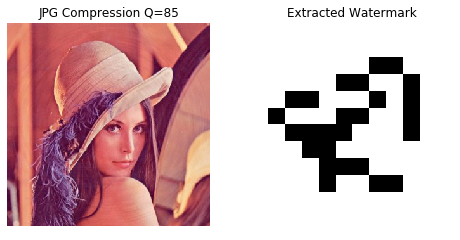

In [100]:
index = 7
(attackedImages[index], attackTitles[index]) = imgAttackedList[index]
(extractedLogos[index], extractedBers[index], transformation) = watermarkExtractFromImage(attackedImages[index], IMG_WATERMARKED, LOGO, n, g, p, d, False, 'N={} G={} P={} D={}\n{}'.format(n, g, p, d, attackTitles[index]))

clear_output(wait = True)
print('BER = {:.2%}'.format(extractedBers[index]))
print(transformation)
imgshow([[attackedImages[index], extractedLogos[index]]], [[attackTitles[index], 'Extracted Watermark']])

In [101]:
print(tabulate(
    [
        attackTitles[0:8],
        list(map(lambda x: '{:.0%}'.format(x), extractedBers[0:8]))
    ],
    tablefmt='orgtbl'
))

| No Attack | Rotation 30° CW | Scaling 85% | Translation X=3% Y=-3% | Crop 3% | Blur K=3 | Noise 3% | JPG Compression Q=85 |
| 0%        | 0%              | 1%          | 44%                    | 10%     | 6%       | 12%      | 0%                   |
